In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [3]:
test_df = pd.read_csv("test.csv")
test_df.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country
0,32562,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States
1,32563,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States
2,32564,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States
3,32565,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States
4,32566,18,NaN,Some-college,Never-married,NaN,Own-child,White,Female,30,United-States


In [4]:
# For Continuous variables
train_df.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


In [5]:
# For Categorical values we describe them by frequency table
# Step-1: Get a list of categorical variables
categorical_variables = train_df.dtypes.loc[train_df.dtypes == "object"].index
categorical_variables

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [6]:
# Step-2: Use the apply function in python to determine the number of unique values in each column
train_df[categorical_variables].apply(lambda x: len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

Here we can see that 6 variables have less than 10 unique values but others have 15 or more unique values which seem to be too high.

In [7]:
# Pandas dataframes have an inbuilt routine called value_counts which gives the count of each category.
# Let's perform univariate analysis.
train_df["Race"].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [8]:
train_df["Race"].value_counts()/train_df.shape[0]

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

In [9]:
train_df["Native.Country"].value_counts()/train_df.shape[0]

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

We find out that US alone has around 90% of the data.

In [10]:
Q1 = train_df['Age'].quantile(0.25)
Q3 = train_df['Age'].quantile(0.75)
IQR = Q3 - Q1
IQR

20.0

### Multivariate Analysis

Multivariate Analysis finds out the relationship between two or more variables. Here, we look for association and disassociation between variables at a pre-defined significance level.
The type of visualization technique to use depends on the type of each variable. Thus there can be 3 combinations of the type of the 2 variables:

1. categorical - categorical
2. continuous - continuous
3. categorical - continuous

### 1. Both Categorical

In this case, we look at the cross-tabulation or confusion matrix of the two variables. This can be done using crosstab function of Pandas.
Lets take an example of sex and income group.

In [11]:
# Print the cross validation
ct = pd.crosstab(train_df["Sex"], train_df["Income.Group"], margins=True)
ct

Income.Group,<=50K,>50K,All
Sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


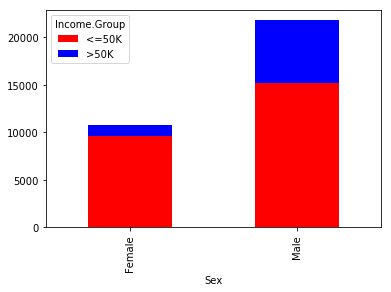

In [12]:
# Let's see it in a plot chart
ct.iloc[:-1, :-1].plot(kind="bar", stacked=True, grid=False, color=["red", "blue"])
plt.show()

### 2. Both Continuous

In this case, we plot a scatter chart and try to make interpretations.

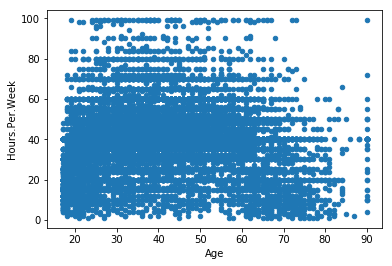

In [13]:
train_df.plot('Age', 'Hours.Per.Week', kind="scatter")
plt.show()

This shows no real relationship between Age and Hours-Per-Week. Even intuitively we were not expecting any specific trend so this is good. In other cases, you might figure out interesting trends which can be exploited.

### 3. Categorical-Continuous combination

In this case, we generally make box-plots for each category. They directly show whether there is a significant difference or not. Let's make one between gender and hours of work.

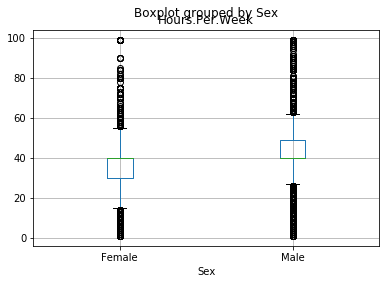

In [14]:
train_df.boxplot(column="Hours.Per.Week", by="Sex")
plt.show()

Here the red line represent median. So we can make the following inferences:

1. The median of male and female working hours are same
2. For Males, the 25% and median values are same
3. For females, the median and 75% are same.
4. Males have higher working hours in general because the 75% percentile of female corressponds to 25% percentile of males.

## Missing value imputation

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
ID                32561 non-null int64
Age               32561 non-null int64
Workclass         30725 non-null object
Education         32561 non-null object
Marital.Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Hours.Per.Week    32561 non-null int64
Native.Country    31978 non-null object
Income.Group      32561 non-null object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 11 columns):
ID                16281 non-null int64
Age               16281 non-null int64
Workclass         15318 non-null object
Education         16281 non-null object
Marital.Status    16281 non-null object
Occupation        15315 non-null object
Relationship      16281 non-null object
Race              16281 non-null object
Sex               16281 non-null object
Hours.Per.Week    16281 non-null int64
Native.Country    16007 non-null object
dtypes: int64(3), object(8)
memory usage: 1.4+ MB


Here we have missing values in 3 variables in both test and train:

1. Workclass (categorical)
2. Occupation (categorical)
3. Native-Country (categorical)

Since all of these are categorical, we can simply impute them with the mode values.

In [17]:
# Impute the values
from scipy.stats import mode
vars_to_impute = ["Workclass", "Occupation", "Native.Country"]
for var in vars_to_impute:
    train_df[var].fillna(train_df[var].mode()[0], inplace=True)
    test_df[var].fillna(test_df[var].mode()[0], inplace=True)

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
ID                32561 non-null int64
Age               32561 non-null int64
Workclass         32561 non-null object
Education         32561 non-null object
Marital.Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Hours.Per.Week    32561 non-null int64
Native.Country    32561 non-null object
Income.Group      32561 non-null object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 11 columns):
ID                16281 non-null int64
Age               16281 non-null int64
Workclass         16281 non-null object
Education         16281 non-null object
Marital.Status    16281 non-null object
Occupation        16281 non-null object
Relationship      16281 non-null object
Race              16281 non-null object
Sex               16281 non-null object
Hours.Per.Week    16281 non-null int64
Native.Country    16281 non-null object
dtypes: int64(3), object(8)
memory usage: 1.4+ MB


## Outlier Treatment

We can check outliers in numerical variables by creating simple scatter plots. Lets do it for both the numerical variables.

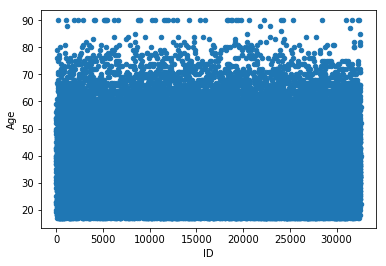

In [20]:
train_df.plot("ID", "Age", kind="scatter")
plt.show()

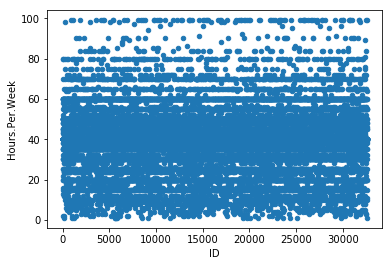

In [21]:
train_df.plot("ID", "Hours.Per.Week", kind="scatter")
plt.show()

In both of the above cases, you would notice that there are no real outliers. One thing to note here is that outliers need not just be a value outside the general cluster of data, as shown in the video lecture.
You should also look for values which are not practically possible. For instance, if any of the age or hours per week was negative, then we should certainly treat it like a missing value.

## Variable Transformation

Variable Transformation is not only about creating new variables, but also making the available information more sensible. This stage involves making new variables using existing variables or perform some numerical transformations on variables like taking a log. During univariate analysis, we saw a number of categories with a very small percentage of observations.

In [22]:
train_df["Workclass"].value_counts()/train_df.shape[0]

Private             0.753417
Self-emp-not-inc    0.078038
Local-gov           0.064279
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: Workclass, dtype: float64

Depending on the business scenario, we can combine the categories with very few observations. As a thumbrule, lets combine categories with less than 5% of the values.

In [23]:
categories_to_combine = ['State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked']
# Run a loop to convert them to 'others'
for cat in categories_to_combine:
    train_df["Workclass"].replace({cat: 'others'}, inplace=True)
    test_df["Workclass"].replace({cat: 'others'}, inplace=True)

In [24]:
train_df["Workclass"].value_counts()/train_df.shape[0]

Private             0.753417
others              0.104266
Self-emp-not-inc    0.078038
Local-gov           0.064279
Name: Workclass, dtype: float64

Here we can see that the categories have been successfully combined. Note that combining is not the best possible techniqe for solving the problem of high cardinality, i.e. high number of unique values.


Now lets repeat the above process for remaining columns. But we'll use a slightly sophisticated method here so that we can repeat the process quickly using a loop.

In [25]:
categorical_variables = train_df.dtypes.loc[train_df.dtypes == "object"].index
categorical_variables

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [26]:
categorical_variables = categorical_variables[1:]
categorical_variables

Index(['Education', 'Marital.Status', 'Occupation', 'Relationship', 'Race',
       'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [27]:
train_df[categorical_variables].apply(lambda x: len(x.unique()))

Education         16
Marital.Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native.Country    41
Income.Group       2
dtype: int64

In [28]:
# Run a loop over these values and combine
for column in categorical_variables:
    # Determine the categories to combine
    frq = train_df[column].value_counts()/train_df.shape[0]
    categories_to_combine = frq.loc[frq.values < 0.05].index
    
    # Loop over all the categories and combine them as others
    for cat in categories_to_combine:
        train_df[column].replace({cat: 'Others'}, inplace=True)
        test_df[column].replace({cat: 'Others'}, inplace=True)

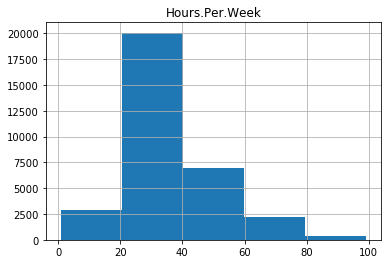

In [29]:
train_df.hist(column="Hours.Per.Week", bins=5)
plt.show()

## Predictive Model

### Data Preprocessing
Data Preprocessing: sklearn accepts only numeric data so we've to convert text to numbers

sklearn provides a function LabelEncoder for converting categories to numbers in range 0,1..(N-1) where N is the number of categories.

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
categorical_variables = train_df.dtypes.loc[train_df.dtypes == "object"].index
categorical_variables

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [32]:
le = LabelEncoder()
for var in categorical_variables:
    train_df[var] = le.fit_transform(train_df[var])
    if var != 'Income.Group':
        test_df[var] = le.fit_transform(test_df[var])

In [33]:
train_df.dtypes

ID                int64
Age               int64
Workclass         int64
Education         int64
Marital.Status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Hours.Per.Week    int64
Native.Country    int64
Income.Group      int64
dtype: object

In [34]:
train_df.head(10)

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,3,0,2,0,1,2,1,40,1,0
1,2,50,2,0,1,2,0,2,1,13,1,0
2,3,38,1,1,0,5,1,2,1,40,1,0
3,4,53,1,3,1,5,0,0,1,40,1,0
4,5,28,1,0,1,6,2,0,0,40,0,0
5,6,37,1,2,1,2,2,2,0,40,1,0
6,7,49,1,3,3,4,1,0,0,16,0,0
7,8,52,2,1,1,2,0,2,1,45,1,1
8,9,31,1,2,2,6,1,2,0,50,1,1
9,10,42,1,0,1,2,0,2,1,40,1,1


In [35]:
test_df.dtypes

ID                int64
Age               int64
Workclass         int64
Education         int64
Marital.Status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Hours.Per.Week    int64
Native.Country    int64
dtype: object

In [36]:
# Fit the model
# In this step we will use sklearn's DecisionTreeClassifier to make a decision tree.
from sklearn.tree import DecisionTreeClassifier

In [37]:
target = "Income.Group" # dependant variable
features = [feature for feature in train_df.columns if feature not in ["ID", target]]
features

['Age',
 'Workclass',
 'Education',
 'Marital.Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Hours.Per.Week',
 'Native.Country']

Now that we have the predictors, lets run the model with the following benchmark parameters:

1. max_depth = 10
2. min_samples_leaf = 100
3. max_features = 'sqrt'

In [38]:
model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, max_features='sqrt')

In [39]:
# Fit the model
model.fit(train_df[features], train_df[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=100,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Make predictions

In [40]:
predictions_train = model.predict(train_df[features])
predictions_test = model.predict(test_df[features])

### Analyze the predictions

Various metrics can be used to evaluate a model depending on the problem at hand. Confusion matrix is a NXN matrix where N is the number of class predicted. It maps the number of labels which get classified correctly and incorrectly. This matrix is easy to interpret and is being used popularly. Let's use prediction accuracy here.

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
acc_train = accuracy_score(train_df[target], predictions_train)

In [43]:
print("Train accuracy %f"%acc_train)

Train accuracy 0.816437


In [44]:
# submission = pd.DataFrame({
#         "ID": test_df["ID"],
#         "Income.Group": predictions_test
#     })

# submission['Income.Group'] = submission['Income.Group'].map( {0: '<=50K', 1: '>50K'} )
# submission.to_csv('prediction.csv', index=False)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
RModel = RandomForestClassifier()

In [47]:
RModel.fit(train_df[features], train_df[target])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [48]:
predictions_train_r = RModel.predict(train_df[features])

In [49]:
acc_train_r = accuracy_score(train_df[target], predictions_train_r)
acc_train_r

0.94573262491938204